# クラスタリングモデルを使うチュートリアル
ブログ：https://techblog.gmo-ap.jp/2022/06/08/experience_clustering/

# データ作成

In [24]:
from sklearn.datasets import make_blobs
import random

centers = random.randint(3, 10)
data, cluster_labels = make_blobs(n_samples=500, #サンプル数
                                  centers=centers, #クラスタの数
                                  n_features=2,  #特徴量の数
                                  cluster_std=1 #クラスタ内の分布のばらつき具合
                                  )

# 分析

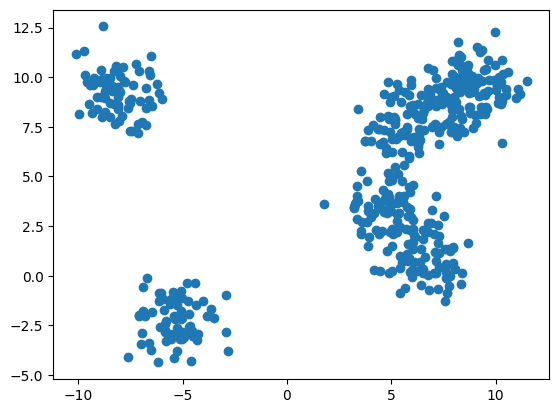

In [25]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1])

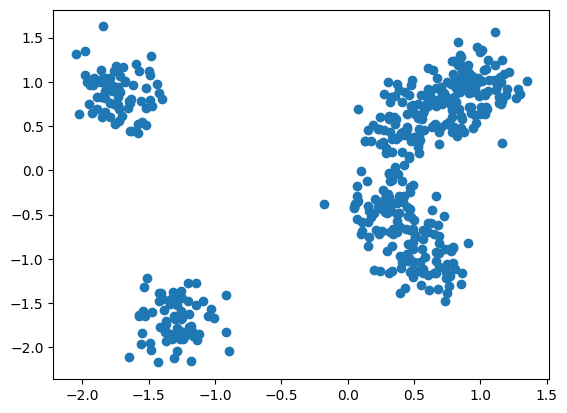

In [26]:
from sklearn import preprocessing

# 標準化
sc = preprocessing.StandardScaler()
data_norm = sc.fit_transform(data)

# 標準化した後のデータ分布を確認
plt.scatter(data_norm[:, 0], data_norm[:, 1])

# クラスタ予測

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


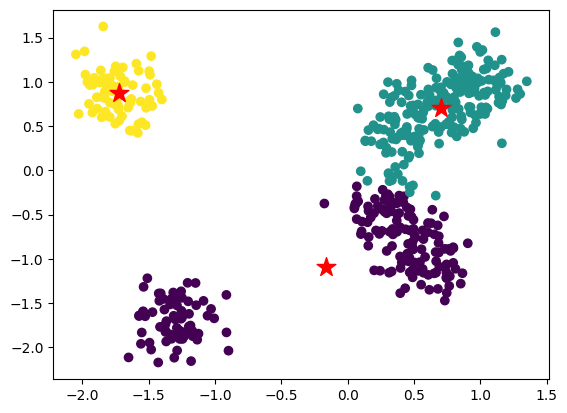

In [27]:
from sklearn.cluster import KMeans

#モデル作成
km = KMeans(n_clusters=3, random_state=0)

#学習
km.fit(data_norm)

#結果を可視化
plt.scatter(data_norm[:, 0], data_norm[:, 1], c=km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', marker='*', s=200)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

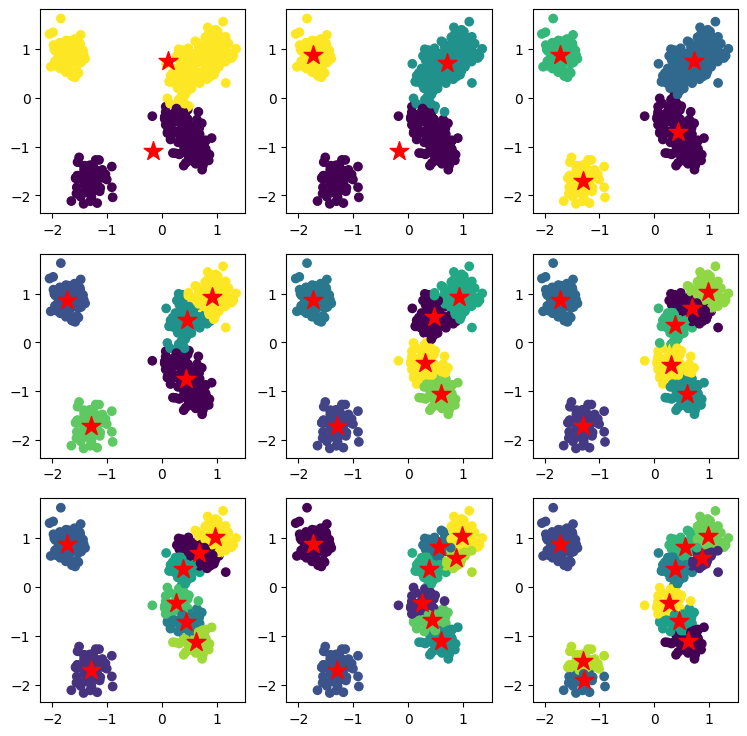

In [28]:
model_list = [KMeans(n_clusters=i, random_state=0) for i in range(2, 11)]
pred_list = []
center_list = []
loss_list = []

for i in range(len(model_list)):
  model_list[i].fit(data_norm)
  pred_list.append(model_list[i].labels_)
  center_list.append(model_list[i].cluster_centers_)
  loss_list.append(model_list[i].inertia_)

plt.figure(figsize=(9, 9))

for i in range(len(pred_list)):
  plt.subplot(3, 3, i+1)
  plt.scatter(data_norm[:, 0], data_norm[:, 1], c=pred_list[i])
  plt.scatter(center_list[i][:, 0], center_list[i][:, 1], color='red', marker='*', s=200)

plt.show()

# 評価

## エルボー法

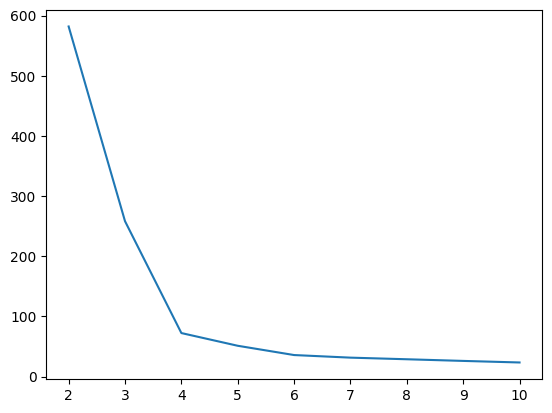

In [29]:
plt.plot(range(2,11), loss_list)
plt.xticks(range(2,11))
plt.show()

## シルエット分析

In [32]:
import numpy as np
from sklearn.metrics import silhouette_samples

In [33]:
def silhouette_evaluate(data, km):

  cluster_labels=np.unique(km.labels_)
  silhouette_vals=silhouette_samples(data, km.labels_)

  y_ax_upper = 0
  y_ax_lower = 0
  yticks=[]

  print(f"クラスタ数：{len(cluster_labels)}")

  for i, class_label in enumerate(cluster_labels):

    c_silhouette_vals = silhouette_vals[km.labels_==class_label]

    print(f"{i}：{len(c_silhouette_vals)}")

    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)

    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor="none",
            )

    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

  silhouette_avg=np.mean(silhouette_vals)
  plt.axvline(silhouette_avg,color="red",linestyle="--")

  plt.ylabel("Cluster")
  plt.xlabel("Silhouette Coefficient")
  plt.yticks(yticks,cluster_labels + 1)

  plt.show()
  print(f"シルエット係数：{silhouette_avg}")
  print()

クラスタ数：5
0：136
1：72
2：97
3：71
4：124


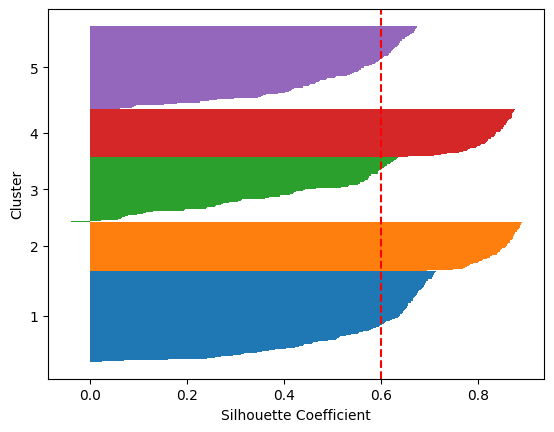

シルエット係数：0.5983486227095209



In [34]:
silhouette_evaluate(data_norm, model_list[3])

クラスタ数：9
0：72
1：53
2：71
3：50
4：52
5：50
6：39
7：37
8：76


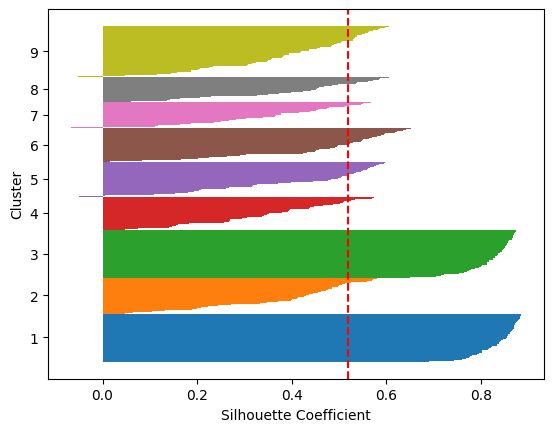

シルエット係数：0.5196840361984522



In [35]:
silhouette_evaluate(data_norm, model_list[7])

クラスタ数：7
0：80
1：71
2：72
3：65
4：54
5：83
6：75


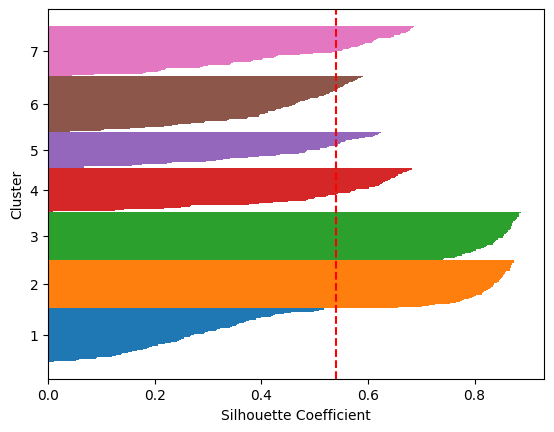

シルエット係数：0.5390859067322761



In [44]:
silhouette_evaluate(data_norm, model_list[5])

クラスタ数：8
0：80
1：71
2：72
3：41
4：50
5：54
6：49
7：83


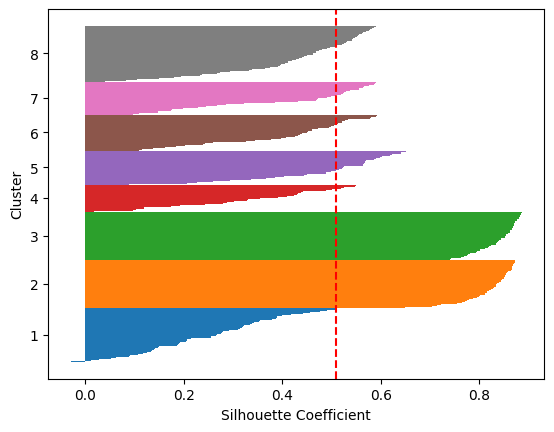

シルエット係数：0.5100104217029271



In [45]:
silhouette_evaluate(data_norm, model_list[6])

クラスタ数：6
0：92
1：71
2：72
3：120
4：65
5：80


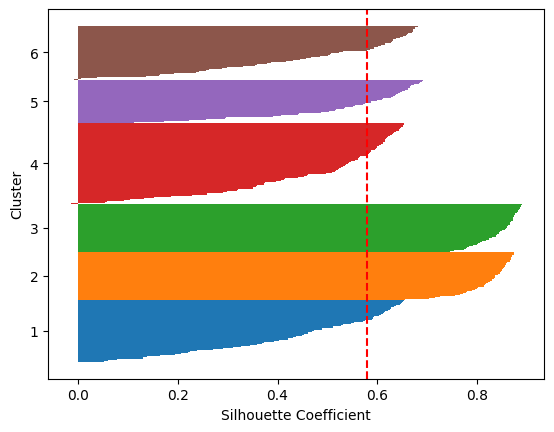

シルエット係数：0.5796407912280065



In [46]:
silhouette_evaluate(data_norm, model_list[4])

7っぽい

# 正解

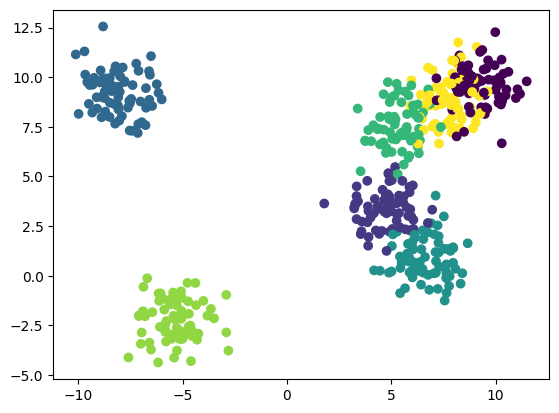

In [47]:
#結果を可視化
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)

In [48]:
centers

7